0.5872202195147035


Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 137MB/s]


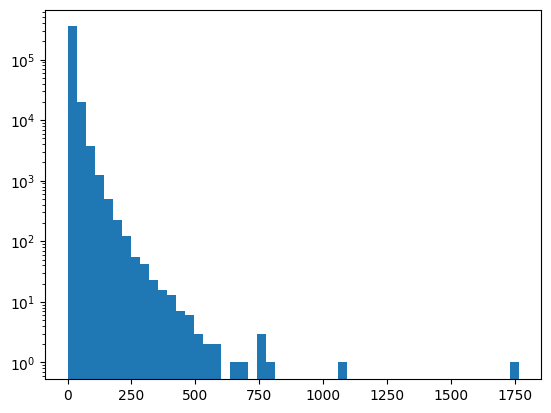

[7.866666666666666, 21.3, 8.633333333333333, 10.466666666666667, 10.0, 9.533333333333333, 22.266666666666666, 10.433333333333334, 9.8, 11.533333333333333, 7.2, 11.033333333333333, 7.8, 12.866666666666667, 9.6, 10.466666666666667, 5.033333333333333, 11.833333333333334, 11.733333333333333, 13.466666666666667, 13.466666666666667, 10.2, 15.3, 9.566666666666666, 12.933333333333334, 10.433333333333334, 8.466666666666667, 6.9, 10.266666666666667, 5.733333333333333, 11.266666666666667, 12.633333333333333, 8.833333333333334, 10.966666666666667, 9.766666666666667, 9.733333333333333, 11.8, 7.8, 10.266666666666667, 17.7, 9.1, 8.333333333333334, 12.666666666666666, 13.0, 6.6, 26.566666666666666, 13.0, 8.5, 12.833333333333334, 8.166666666666666, 9.466666666666667, 9.9, 12.466666666666667, 7.766666666666667, 9.466666666666667, 12.933333333333334, 9.666666666666666, 11.433333333333334, 13.7, 8.966666666666667, 7.4, 15.8, 15.9, 12.6, 10.633333333333333, 15.566666666666666, 9.2, 9.433333333333334, 6.566

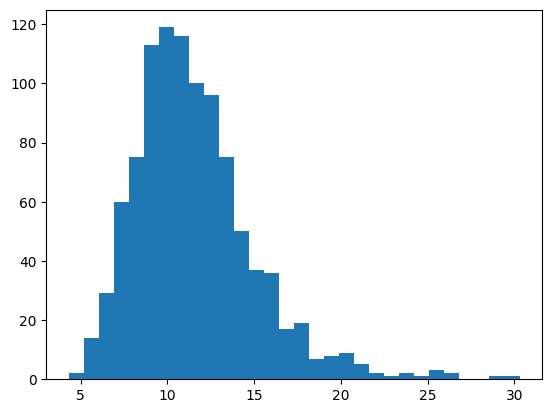

13.172848017867965 16.325159950259522
2.495408195140708
2.1390005694958574 0.03315179520224784


In [ ]:
import numpy as np
x = [0,3,5,7,10]

s = np.std(x)
m = np.mean(x)
z = (7-m)/s # 7에 대해 표준점수 구하기
print(z)

from scipy import stats # 수학 및 과학 알고리즘을 제공하는 사이파이
stats.zscore(x) # 배열 x에 대한 모든 z점수 계산

# 평균이 0이고 표준편차가 1인 정규분포를 표준정규분포라고 함.
stats.norm.cdf(0) # 표준정규분포에서 평균 0까지 누적분포는 정확히 50%
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0) # 표준정규분포에서 z점수 1이내의 비율 (-1~1) 대략 68%
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0) # (-2~2) 90%
stats.norm.ppf(0.9) # 0~90%에서 90%에 해당하는 z점수 알아보기 1.28

# 중심극한정리 : 무작위로 샘플을 뽑아 만든 표본의 평균은 정규분포에 가깝다.
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

import matplotlib.pyplot as plt

plt.hist(ns_book7['대출건수'], bins=50)
plt.yscale('log')
plt.show()

np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(30).mean() # 랜덤으로 30개 뽑아서 평균 구하기 1000번 반복
    sample_means.append(m)
print(sample_means)
plt.hist(sample_means, bins=30)
plt.show() # 정규분포를 따름

np.mean(sample_means) # 표본평균의 평균
ns_book7['대출건수'].mean() # 모집단의 평균 둘이 소수 첫째자리까지 같다.

np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(20).mean() # 랜덤으로 20개 뽑음, 실제 평균과 멀어짐
    sample_means.append(m)
np.mean(sample_means)

np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(40).mean() # 랜덤으로 40개 뽑음, 실제 평균과 가까워짐
    sample_means.append(m)
np.mean(sample_means)

# 표본 평균의 표준편차는 모집단의 표준편차/sqrt(표본에 포함된 샘플 개수)와 비슷하다. s = (모집단 표준편차)/sqrt(n)
np.std(sample_means)
np.std(ns_book7['대출건수']) / np.sqrt(40)

# 모집단의 평균 범위 추정하기: 신뢰구간
# 남산 도서관 대출 건수 = 모집단, 파이썬을 표본집단으로 가정.
python_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('파이썬') # 주제분류번호가 00으로 시작하고 파이썬이라는 문자열을 포함하는 불리언 배열
python_books = ns_book7[python_books_index] # 위의 조건에 해당하는 행들 모음
python_books.head()
len(python_books) # 251
python_mean = np.mean(python_books['대출건수']) # 14.749..... 표본평균
# z = x-u/s = 14.75-u/ (모집단 표준편차)/sqrt(n)
# u = 14.75-z*모집단표준편차/sqrt(n)
python_std = np.std(python_books['대출건수']) # 표본 표준편차
python_se = python_std / np.sqrt(len(python_books)) # 모집단의 표준편차 대신 표본의 표준편차인 python_std를 이용한다.

stats.norm.ppf(0.975) # 95% 신뢰구간 차지하면 양쪽 공백은 2.5%이다. 1.9599...
stats.norm.ppf(0.025) # -1.9599...
print(python_mean - 1.96*python_se, python_mean + 1.96*python_se) # 모집단의 평균이 13.2~16.3일 확률이 95%이다.

# z 점수로 가설 검증하기
cplus_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('C++', regex=False)
cplus_books = ns_book7[cplus_books_index]
cplus_books.head()
len(cplus_books) # 89
cplus_mean = np.mean(cplus_books['대출건수']) # 11.59
cplus_se = np.std(cplus_books['대출건수'])/ np.sqrt(len(cplus_books)) # 표본의 표준오차

print((python_mean - cplus_mean) / np.sqrt(python_se**2 + cplus_se**2)) # z 점수로 대입(영가설이었으므로 u1=u2) z = 2.49....
stats.norm.cdf(2.50) # 0.994 -> 양쪽 끝의 면적이 0.006이므로 0.01로 매우 작다. 따라서 평균에 차이가 없다는 영가설을 기각한다. -> 차이가 있음!!

# t-검정으로 가설 검증하기 : 사이파이에 ttest_ind()로 두 표본의 평균을 비교한다. t점수와 p-값을 반환한다.
t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수']) # p값이 0.03으로 영가설의 기각 수준인 0.05보다 낮다. 기각!
print(t, pvalue)

# 정규분포가 아닐 때 가설 검증하기 : 순열검정
def statistic(x, y): # 두 배열의 평균 차이
    return np.mean(x) - np.mean(y)

def permutation_test(x, y):
    # 표본의 평균 차이를 계산합니다.
    obs_diff = statistic(x, y)
    # 두 표본을 합칩니다.
    all = np.append(x, y)
    diffs = []
    np.random.seed(42)
    # 순열 검정을 1000번 반복합니다.
    for _ in range(1000):
        # 전체 인덱스를 섞습니다.
        idx = np.random.permutation(len(all)) # permtation(랜덤으로 섞음.)
        # 랜덤하게 두 그룹으로 나눈 다음 평균 차이를 계산합니다.
        x_ = all[idx[:len(x)]]
        y_ = all[idx[len(x):]]
        diffs.append(statistic(x_, y_))
    # 원본 표본보다 작거나 큰 경우의 p-값을 계산합니다.
    less_pvalue = np.sum(diffs < obs_diff)/1000
    greater_pvalue = np.sum(diffs > obs_diff)/1000
    # 둘 중 작은 p-값을 선택해 2를 곱하여 최종 p-값을 반환합니다.
    return obs_diff, np.minimum(less_pvalue, greater_pvalue) * 2